Calculating loads: 100%|██████████| 4152/4152 [00:00<00:00, 39217.82it/s]


{'num_bus_stops': 24, 'total_people': 2413.931999999994, 'overloaded_edges_count': 0, 'longest_overloaded_edge_length': 0, 'sytem_score': 1.0}


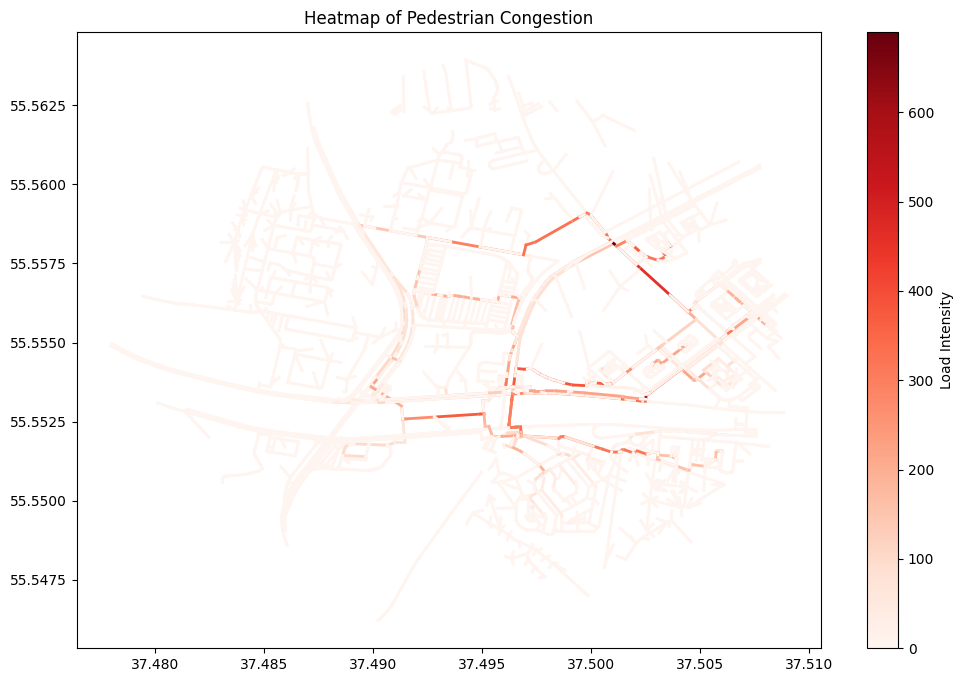

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree
from street_graph import (create_graph, add_places_to_graph, calculate_population, summarize_traffic_data,
                   assign_routes_to_population, calculate_population_loads, update_weights, plot_heatmap, add_population_column_to_houses )

# --- Load and preprocess data ---
house_path = "Векторные данные/Дома_исходные.shp"
bus_path = "Векторные данные/Остановки_ОТ.shp"
files = {"Streets_исходные": "Векторные данные/Streets_исходные.shp"}

houses = gpd.read_file(house_path).to_crs(epsg=4326)

houses["Apartments"] = houses["Apartments"].fillna(0) 
buses = gpd.read_file(bus_path).to_crs(epsg=4326)
streets = gpd.GeoDataFrame(pd.concat([
    gpd.read_file(path).to_crs(epsg=4326).query("Foot == 1")
    for path in files.values()
], ignore_index=True)).loc[lambda df: df.geometry.type == 'LineString']

point = gpd.GeoDataFrame(geometry=[Point(37.495, 55.555)], crs="EPSG:4326").to_crs(epsg=3857)
radius = 1500

houses = houses.to_crs(epsg=3857)
buses = buses.to_crs(epsg=3857)
streets = streets.to_crs(epsg=3857)

houses = houses[houses.geometry.distance(point.geometry.iloc[0]) <= radius]
buses = buses[buses.geometry.distance(point.geometry.iloc[0]) <= radius]
streets = streets[streets.geometry.distance(point.geometry.iloc[0]) <= radius]

houses = houses.to_crs(epsg=4326)
buses = buses.to_crs(epsg=4326)
streets = streets.to_crs(epsg=4326)

# --- Calculate population in each house ---
houses = add_population_column_to_houses(houses)  # Добавление столбца 'Total_People'

cool_houses = houses
# --- Create graph and add places ---
G, nodes = create_graph(streets)
node_coords = np.array(nodes)
tree = cKDTree(node_coords)

add_places_to_graph(houses, G, tree, node_coords, 'house')
add_places_to_graph(buses, G, tree, node_coords, 'bus_stop')

# --- Assign routes and calculate loads based on population ---
route_distribution = assign_routes_to_population(G, houses, buses, tree, node_coords)
edge_loads = calculate_population_loads(G, route_distribution)

# --- Update weights based on loads and visualize heatmap ---
update_weights(G, edge_loads)

summary = summarize_traffic_data(G, edge_loads, route_distribution, buses)
print(summary)

plot_heatmap(G, edge_loads)



[((37.502710084730815, 55.55002575945339), (37.50255045410482, 55.549074768347026), {'weight': 0.000964295608794173}), ((37.502710084730815, 55.55002575945339), (37.50279488569364, 55.5505457102349), {'weight': 0.0005268206701411672}), ((37.502710084730815, 55.55002575945339), (37.50412538046094, 55.5497884457766), {'weight': 0.0014350539310096025}), ((37.502710084730815, 55.55002575945339), (37.50234433566695, 55.54990263089273), {'weight': 0.00038591841128645673}), ((37.502710084730815, 55.55002575945339), (37.50302456837041, 55.54981454788356), {'weight': 0.00037882751589953656}), ((37.502710084730815, 55.55002575945339), (37.503050604312904, 55.55011214333384), {'weight': 0.0003513057935584159}), ((37.502710084730815, 55.55002575945339), (37.50240604992782, 55.55021189973994), {'weight': 0.00035649034728748647}), ((37.50255045410482, 55.549074768347026), (37.502710084730815, 55.55002575945339), {'weight': 0.000964295608794173}), ((37.50255045410482, 55.549074768347026), (37.5022846

d:\desktop\Hackatone\ЦП_МЕЖНАР\ai_roads\.venv\Lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
d:\desktop\Hackatone\ЦП_МЕЖНАР\ai_roads\.venv\Lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
d:\desktop\Hackatone\ЦП_МЕЖНАР\ai_roads\.venv\Lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(fun

LINESTRING (37495 55555, 37498.117449009296 55551.09084258766, 37503.03709695229 55550.19805811367, 37498.21728264881 55548.867873885836, 37502.89845700201 55550.624748006245, 37497.91858553203 55550.17655146173, 37502.91858553203 55550.17655146173, 37497.93871406205 55550.624748006245, 37502.93871406205 55550.624748006245, 37497.958842592074 55550.17655146173, 37502.958842592074 55550.17655146173, 37497.978971122095 55550.624748006245, 37502.660145475296 55552.38162212665, 37499.90566056804 55556.55448839526, 37504.19790453605 55553.98999200823, 37500.15281956417 55556.928918269696, 37504.445063532185 55554.36442188267, 37499.94021919267 55556.53384057825, 37504.23246316068 55553.969344191224, 37500.187378188806 55556.90827045269, 37504.47962215682 55554.34377406566, 37499.974777817304 55556.513192761246, 37504.267021785316 55553.94869637422, 37500.22193681344 55556.88762263568, 37504.51418078145 55554.32312624865, 37500.469095809574 55557.262052510116, 37504.761339777586 55554.697556

C:\Users\Terri\AppData\Local\Temp\ipykernel_17960\289688134.py:94: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


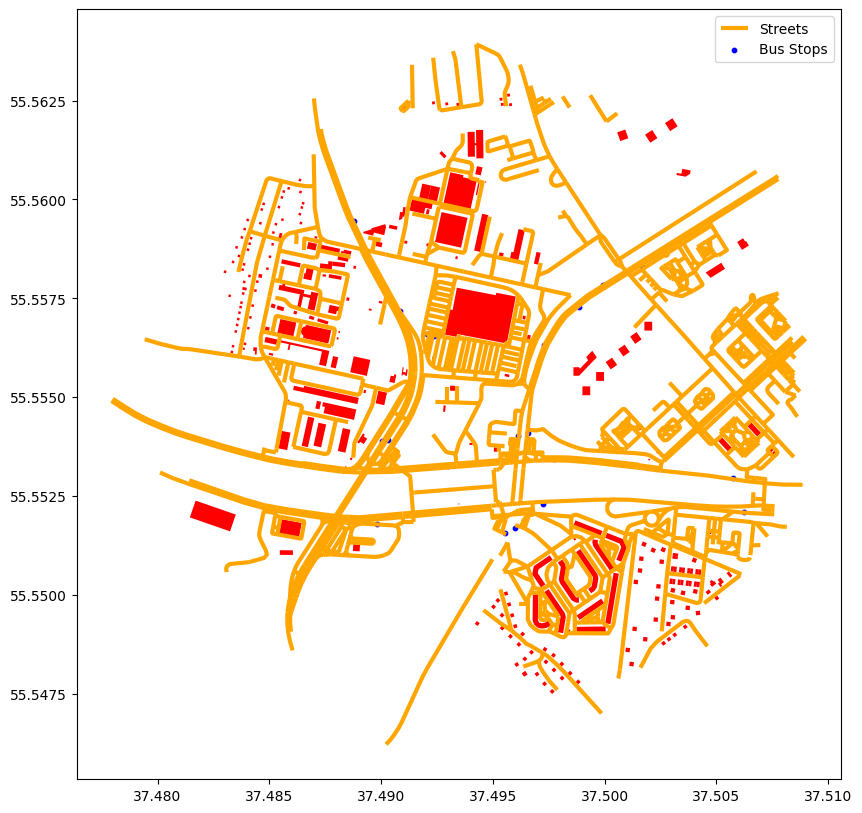

In [93]:
from catboost import CatBoostRegressor
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import random
import numpy as np
import geopandas as gpd

# --- Подготовка данных для модели ---
X, y = [], []
print(G.edges.data(data=True))
for u, v in G.edges:
    node_u, node_v = u, v
    # Извлекаем координаты (x, y) из кортежей узлов
    x_u, y_u = node_u  # Кортеж (x_u, y_u)
    x_v, y_v = node_v  # Кортеж (x_v, y_v)
    weight = G[u][v].get('weight')
    load = G[u][v].get('total_people')
    features = [
        x_u * 1000, y_u * 1000,  # координаты узла u
        x_v * 1000, y_v * 1000, # координаты узла v
        weight * 1000,     # вес ребра
    ]
    X.append(features)
    loads = np.array(list(edge_loads.values()))
    y = loads

# --- Обучение модели ---
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=0)
model.fit(X, y)

# Исправление невалидных геометрий и фильтрация
cool_houses = cool_houses[cool_houses.is_valid]  # Удаляем строки с невалидной геометрией
cool_houses['geometry'] = cool_houses['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)

houses = houses[houses.is_valid]
houses['geometry'] = houses['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)

streets = streets[streets.is_valid]
streets['geometry'] = streets['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)

# Обновленный блок проверки пересечения
def generate_new_street(graph, model, start_point, num_points=100, step_size=5):
    points = [start_point]
    current_point = start_point
    
    for _ in range(num_points - 1):
        candidates = []
        for angle in np.linspace(0, 2 * np.pi, 36):
            new_point = Point(
                current_point.x + step_size * np.cos(angle),
                current_point.y + step_size * np.sin(angle)
            )
            
            another_houses = cool_houses  # Мы уже очистили и проверили их
            if not another_houses.geometry.intersects(new_point.buffer(4)).any():
                candidates.append(new_point)
        
        if candidates:
            candidate_features = [[
                current_point.x, current_point.y,
                candidate.x, candidate.y,
                1
            ] for candidate in candidates]
            
            predictions = model.predict(candidate_features)
            current_point = candidates[np.argmin(predictions)]
            points.append(current_point)
    
    return points

# Генерация и визуализация
start_point = Point(37495, 55555)
new_street_points = generate_new_street(G, model, start_point)
new_street_line = LineString(new_street_points)

fig, ax = plt.subplots(figsize=(10, 10))

# Отображение старых улиц
streets.plot(ax=ax, color='orange', linewidth=3, label="Streets")

# Отображение новых объектов
#gpd.GeoSeries([new_street_line]).plot(ax=ax, color='green', linewidth=2, label="New Street")
houses.plot(ax=ax, color='red', markersize=10, label="Houses")
buses.plot(ax=ax, color='blue', markersize=10, label="Bus Stops")
print(new_street_line)
xd = gpd.GeoSeries([new_street_line])
xd.to_csv("xd.csv")
# print(xd)
# divided_list = [x / 1000 for x in xd]
# print(divided_list)
#df[].plot(ax=ax, color='green', markersize=10, label="New Street")


plt.legend()
plt.show()
